## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob

In [2]:
%bob write code to generate an image with noise

To generate an image with noise, we can use the `numpy` library to create a random matrix of pixels and add noise to it.

Here's the code to generate an image with random noise:

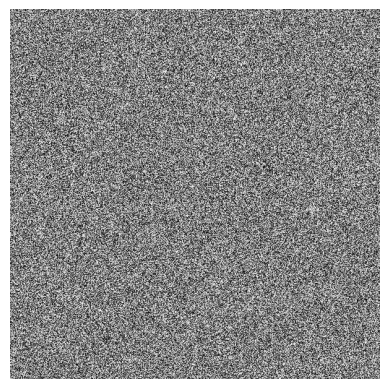

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the image
image_size = (512, 512)

# Generate random noise
noise = np.random.rand(*image_size)

# Display the noisy image
plt.imshow(noise, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
%bob please generate a grayscale image that contains 10 objects looking like nuclei with a radius of 20 pixels

To generate a grayscale image with 10 objects resembling nuclei with a radius of 20 pixels, we can use the `skimage.draw.circle_perimeter` function from the `scikit-image` library.

Here's the code to generate the image:

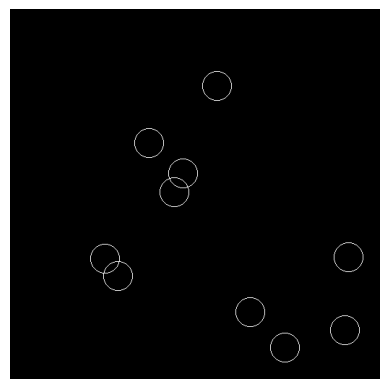

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle_perimeter

# Set the size of the image
image_size = (512, 512)

# Create an empty image
image = np.zeros(image_size)

# Generate 10 random centers for the nuclei
centers = np.random.randint(20, 492, size=(10, 2))

# Add the nuclei to the image
for center in centers:
    rr, cc = circle_perimeter(center[0], center[1], radius=20, shape=image_size)
    image[rr, cc] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()